In [1]:
# Import packages.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from sympy import symbols, Eq, solve
from sympy import Matrix
# Load the .mat file.
mat_contents=sio.loadmat('./singlerun_eiSTDP_distributions.mat')

In [2]:
c = mat_contents['c'].squeeze()
Cee_distribution = mat_contents['Cee_distribution']
Cei_distribution = mat_contents['Cei_distribution']
Cii_distribution = mat_contents['Cii_distribution']
dt = mat_contents['dt'].squeeze()
dtRate = mat_contents['dtRate'].squeeze()
eRateT = mat_contents['eRateT'].squeeze()
iRateT = mat_contents['iRateT'].squeeze()
eta_ei = mat_contents['eta_ei'].squeeze()
Ie_current = np.mean(mat_contents['IeRec'],axis=0)
Ii_current = np.mean(mat_contents['IiRec'],axis=0)
Ix_current = np.mean(mat_contents['IxRec'],axis=0)
Jm = mat_contents['Jm']
Jxm = mat_contents['Jxm']
JRec_ei = mat_contents['JRec_ei']
mean_J_ei = np.mean(JRec_ei,axis=0)
mC = mat_contents['mC']
mR = mat_contents['mR']
mV = mat_contents['mV']
N = mat_contents['N'].squeeze()
Ree_distribution = mat_contents['Ree_distribution']
Rei_distribution = mat_contents['Rei_distribution']
Rii_distribution = mat_contents['Rii_distribution']
reSim = mat_contents['reSim']
riSim = mat_contents['riSim']
rx = mat_contents['rx'].squeeze()
seed = mat_contents['seed'].squeeze()
spikeIndex_E = mat_contents['spikeIndex_E'].squeeze()
spikeTimes_E = mat_contents['spikeTimes_E'].squeeze()
spikeIndex_I = mat_contents['spikeIndex_I'].squeeze()
spikeTimes_I = mat_contents['spikeTimes_I'].squeeze()
T = mat_contents['T'].squeeze()
T1 = mat_contents['T1'].squeeze()
T2 = mat_contents['T2'].squeeze()
tauSTDP = mat_contents['tauSTDP'].squeeze()
Tburn = mat_contents['Tburn']
Tburn_raster = mat_contents['Tburn_raster'].squeeze() 
Var_e_distribution = mat_contents['Var_e_distribution']
Var_i_distribution = mat_contents['Var_i_distribution']
W = mat_contents['W']
winsize = mat_contents['winsize'].squeeze()
Wx = mat_contents['Wx']

Jmax_ei = mat_contents['Jmax_ei'].squeeze() *np.sqrt(N)

time_axis = np.linspace(0,T/1000,len(JRec_ei[0,:]))
print(eta_ei*Jmax_ei)

0.007071067810058594


In [106]:
# We want distributions of rates, covs, vars, corrs, weights, and a raster. 
# And plot of E,I,X currents

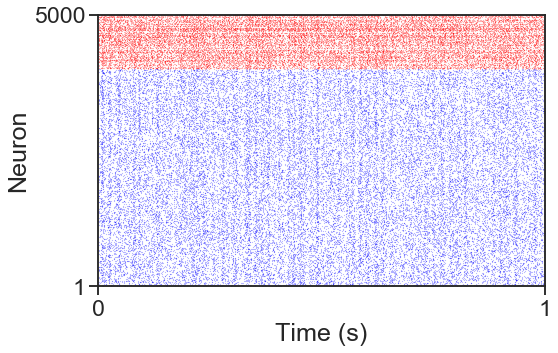

In [206]:
# Raster.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

# indxs =  np.argsort(spikeTimes_E)
# spikeTimes_E = spikeTimes_E[indxs]
# spikeIndex_E = spikeIndex_E[indxs]

plt.plot((spikeTimes_E-Tburn_raster)/1000,spikeIndex_E, '.', color='blue', markersize=.2)
plt.plot((spikeTimes_I-Tburn_raster)/1000,spikeIndex_I, '.', color='red', markersize=.2)

plt.xlabel('Time (s)')
plt.ylabel('Neuron')

plt.xlim((0,(T-Tburn_raster)/1000))
plt.xlim((0,1))
plt.ylim((0,N))

plt.xticks((0,1))
plt.yticks((1,N))

plt.show()

fig.savefig("./PlotsReview_BNs/raster_eiSTDP.pdf", bbox_inches="tight")


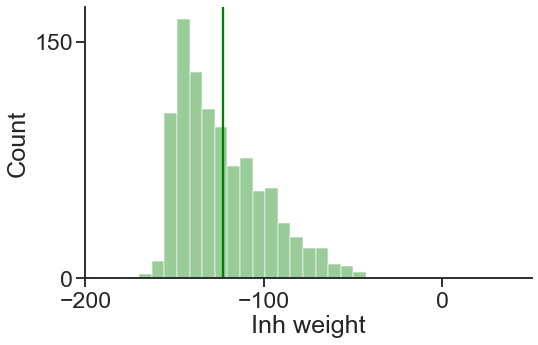

In [216]:
# Distribution of weights.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

mean_each_synapse = np.mean(JRec_ei[:,len(JRec_ei[0,:])//2:len(JRec_ei[0,:])] , axis=1)

sns.distplot(mean_each_synapse*np.sqrt(N),kde=False, color='green')

plt.axvline(np.mean(JRec_ei[:,-1]*np.sqrt(N)), color='green')

plt.xlabel('Inh weight')
plt.ylabel('Count')

plt.xlim((-200,50))

plt.xticks((-200,-100,0))
plt.yticks((0,150))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig4-distributions-iSTDP/weights_dist_eiSTDP.pdf", bbox_inches="tight")



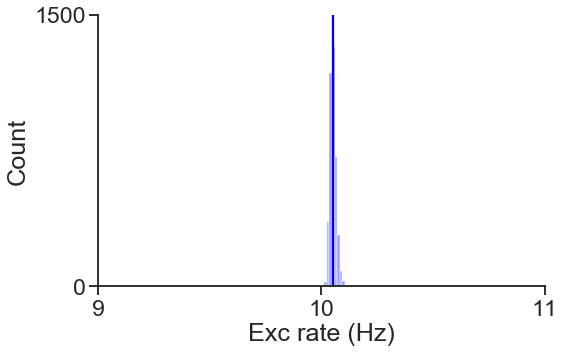

In [208]:
# Distribution of rates.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

sns.distplot(reSim*1000,kde=False,color='blue', bins=10)
# sns.distplot(riSim*1000,kde=False, color='red')

plt.axvline(np.mean(1000*reSim),color='blue')

plt.xlabel('Exc rate (Hz)')
plt.ylabel('Count')

plt.xlim((9,11))

plt.xticks((9,10,11))
plt.yticks((0,1500))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig4-distributions-iSTDP/eRates_dist_eiSTDP.pdf", bbox_inches="tight")


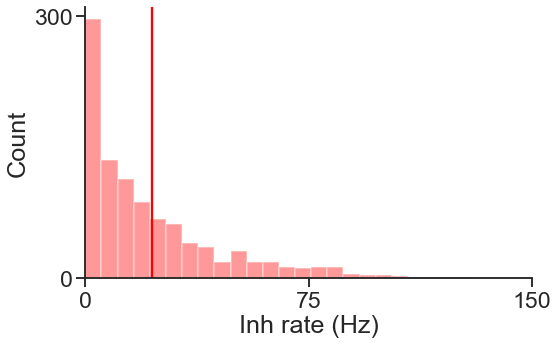

In [209]:
# Distribution of rates.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

# sns.distplot(reSim*1000,kde=False)
sns.distplot(riSim*1000,kde=False, color='red')

plt.axvline(np.mean(1000*riSim),color='red')

plt.xlabel('Inh rate (Hz)')
plt.ylabel('Count')

plt.xlim((0,150))

plt.xticks((0,75,150))
plt.yticks((0,300))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig4-distributions-iSTDP/iRates_dist_eiSTDP.pdf", bbox_inches="tight")


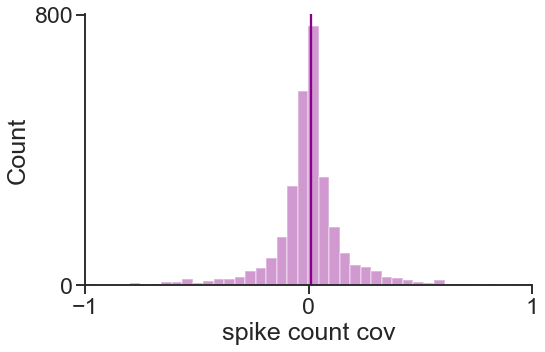

In [210]:
# Distribution of covs.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

sns.distplot([Cee_distribution,Cei_distribution,Cii_distribution],
             kde=False,bins=100,color='darkmagenta')

plt.axvline(np.nanmean([Cee_distribution,Cei_distribution,Cii_distribution]),
            color='darkmagenta')

plt.xlabel('spike count cov')
plt.ylabel('Count')

plt.xlim((-1,1))

plt.xticks((-1,0,1))
plt.yticks((0,800))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig4-distributions-iSTDP/covs_dist_eiSTDP.pdf", bbox_inches="tight")


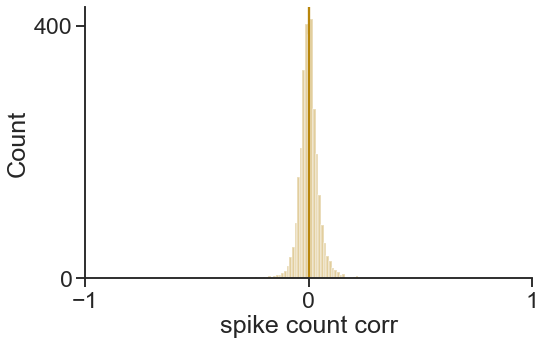

In [211]:
# Distribution of corrs.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

sns.distplot([Ree_distribution,Rei_distribution,Rii_distribution],
             kde=False,bins=40,color='darkgoldenrod')

plt.axvline(np.nanmean([Ree_distribution,Rei_distribution,Rii_distribution]),
            color='darkgoldenrod')

plt.xlabel('spike count corr')
plt.ylabel('Count')

plt.xticks((-1,0,1))
plt.yticks((0,400))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig4-distributions-iSTDP/corrs_dist_eiSTDP.pdf", bbox_inches="tight")


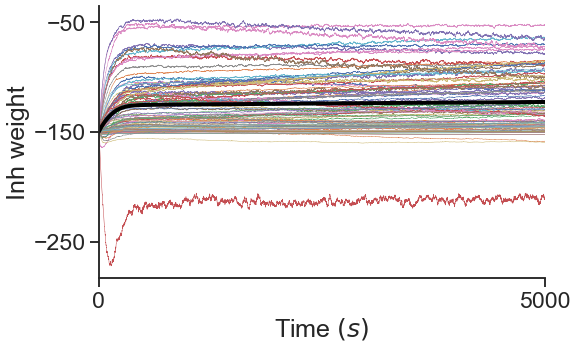

In [7]:
# Plot mean EI weight over time.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":0.5})

for i in range(100):
    plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))
# i=0
# plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))

plt.plot(time_axis,mean_J_ei*np.sqrt(N),color='black',linewidth=4,label='mean')

# plt.axhline(y=Jmax_ee_soft*np.sqrt(N),color='k')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Inh weight')

plt.xlim((0,T/1000))

plt.xticks((0,T/1000))
plt.yticks((-250,-150,-50))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig4-distributions-iSTDP/weight_evolution_eiSTDP.pdf", bbox_inches="tight")


In [3]:
# mat_contents=sio.loadmat('./BurnVariablesCorrTestIC.mat')
# mat_contents=sio.loadmat('../BurnVariablesCorrTestIC-3-20.mat')
# mat_contents=sio.loadmat('./BurnVariablesUncorr.8.19.2019.LargeN.mat')
# mat_contents=sio.loadmat('./BurnVariablesUncorrTestIC.mat')
mat_contents=sio.loadmat('./diffIC_eiSTDP_Oct6.mat')
alpha_e = mat_contents['alpha_e'].squeeze()
c = mat_contents['c'].squeeze()
dt = mat_contents['dt'].squeeze()
Jm = mat_contents['Jm']
Jxm = mat_contents['Jxm']
mean_Jei_recorded = mat_contents['mean_Jei_recorded']
P = mat_contents['P']
N = mat_contents['N'].squeeze()
Ne = mat_contents['Ne'].squeeze()
Ni = mat_contents['Ni'].squeeze()
R_e_sims = mat_contents['R_e_sims'].T
R_i_sims = mat_contents['R_i_sims'].T
R_e_theory = mat_contents['R_e_theory']
R_i_theory = mat_contents['R_i_theory']
rx = mat_contents['rx'].squeeze()
tauSTDP = mat_contents['tauSTDP'].squeeze()
W = mat_contents['W']
winsize = mat_contents['winsize'].squeeze()
Wx = mat_contents['Wx']

Jmax_ei = mat_contents['Jmax_ei']
eta_ei = mat_contents['eta_ei'] * Jmax_ei
Jm_ei_iSTDP_vector = mat_contents['Jm_ei_iSTDP_vector'].squeeze() * np.sqrt(N)

time_axis = np.linspace(0,T/1000,len(mean_Jei_recorded[0,:]))

In [4]:
eta_ei

array([[0.0001]])

0.0
0.2
0.4
0.6
0.8


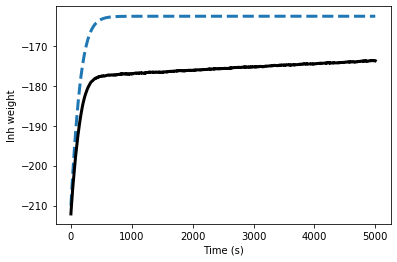

In [15]:
## Symbolic computation of the theoretical fixed point of the system for a set of different initial conditions.

pex = 0.1; qx = 0.2;  qi = 0.2; qe = 0.8; pix = 0.1;
pee = 0.1; pei = 0.1; pie = 0.1; pii = 0.1; jex = 180;
jix = 135; jee = 25; jie = 112.5; jii = -250; jei=-150;
taux = 10; taue = 8; taui = 4; tauc = 5; rx = 10/1000; tauSTDP = 200;
wex = pex*qx*jex
wee = pee*qe*jee 
wix = pex*qi*jix 
wei = pei*qi*jei 
wie = pie*qe*jie 
wii = pii*qi*jii

W = np.array(([wee, wei], [wie, wii])).reshape((2,2))
Wx = np.array([wex, wix]).reshape((2,1))

Diff_E = R_e_sims - R_e_theory
Diff_I = R_i_sims - R_i_theory

time = 500000 # T/dt
j_ei = np.zeros((time,1))
j_ei[0,0] = -210
i=27 # For jei^0=-150
i=8
for t in range(time-1):
    wei = pei*qi*j_ei[t,0]
    W = np.array(([wee, wei], [wie, wii])).reshape((2,2))
    Correction = np.array(([Diff_E[i,0]/np.sqrt(N), Diff_I[i,0]/np.sqrt(N)])).reshape((2,1))
    r = - np.linalg.inv(W) @ (Wx * rx + Correction)
    r_e = r[0,0]
    r_i = r[1,0]
    dj_ei = - j_ei[t]/(Jmax_ei*np.sqrt(N)) * eta_ei * (2*tauSTDP*r_e - alpha_e) *r_i
    j_ei[t+1] = j_ei[t] + 10000*0.1 * dj_ei
    if(t % (time/5) == 0):
        print(t/time)

plt.plot(np.linspace(0,5000,len(j_ei)),j_ei,linewidth=3, linestyle='--')

plt.plot(np.linspace(0,5000,len(mean_J_ei)),mean_J_ei*np.sqrt(N),color='black',linewidth=3,label='mean')

# plt.ylim(-160,-90)
# plt.xlim(-10,5010)

# plt.xticks((0,5000))

plt.xlabel('Time (s)')
plt.ylabel('Inh weight')


plt.show()

In [11]:
Jm_ei_iSTDP_vector[8]

-210.0

In [ ]:
# mean_Jei_recorded[20,-1]

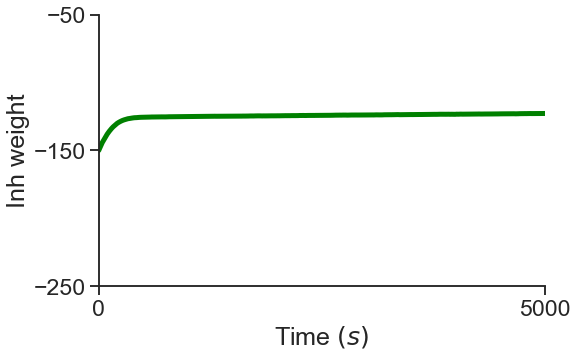

In [219]:
# Plot mean EI weight over time empirically and theoretically.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":.05})


plt.plot(time_axis,mean_J_ei*np.sqrt(N),color='green',linewidth=5,label='mean')

# plt.axhline(y=Jmax_ee_soft*np.sqrt(N),color='k')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Inh weight')

plt.xlim((0,T/1000))

plt.xticks((0,T/1000))
plt.yticks((-250,-150,-50))

sns.despine()
plt.show()

# fig.savefig("./PlotsReview_BNs/weight_evolution_eiSTDP.pdf", bbox_inches="tight")


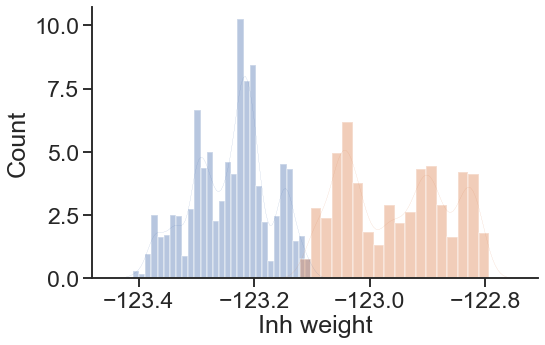

In [62]:
# Check for stationarity of the time series
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":.1})


# Starting at i, what's the distribution of the time series?
i1 = 8*len(mean_J_ei)//10
i2 = 9*len(mean_J_ei)//10
sns.distplot(mean_J_ei[i1:i2]*np.sqrt(N))
j1 = 9*len(mean_J_ei)//10
j2 = 10*len(mean_J_ei)//10
sns.distplot(mean_J_ei[j1:j2]*np.sqrt(N))

# Should it be normal or just symmetric?

plt.ylabel(r'Count')
plt.xlabel(r'Inh weight')

# plt.xlim((0,T/1000))
# plt.ylim((0,4))

# plt.xticks((0,T/1000))
# plt.yticks((0,5,10,15))

sns.despine()
plt.show()

# fig.savefig("./PlotsReview_BNs/weight_evolution_ee_kohonen.pdf", bbox_inches="tight")



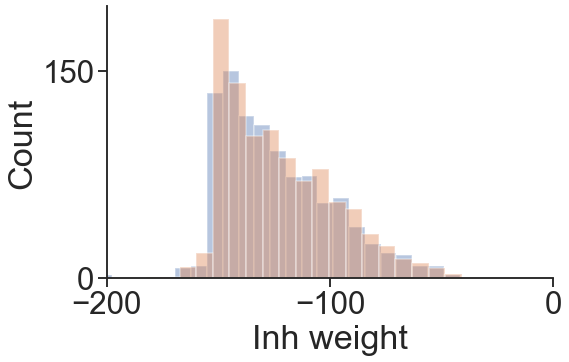

In [71]:
# Check for stationarity of the time series
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.1})


# Starting at i, what's the distribution of the time series?
sns.distplot(JRec_ei[:,40000]*np.sqrt(N),kde=False)

sns.distplot(JRec_ei[:,-1]*np.sqrt(N),kde=False)

# plt.axvline(x=Jmax_ee_soft*np.sqrt(N),color='darkslategray',linewidth=4,linestyle='--')

# Should it be normal or just symmetric?

plt.ylabel(r'Count')
plt.xlabel(r'Inh weight')

# plt.xlim((0,T/1000))
plt.xlim((-200,0))

plt.yticks((0,150))
plt.xticks((-200,-100,0))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/weight_distribution_kstest_eiSTDP.pdf", bbox_inches="tight")



In [65]:
from scipy import stats
stats.ks_2samp(JRec_ei[:,40000]*np.sqrt(N),JRec_ei[:,-1]*np.sqrt(N))

Ks_2sampResult(statistic=0.024, pvalue=0.9357699014782725)

Since the p-value is greater than 0.05, we retain the null hypothesis.

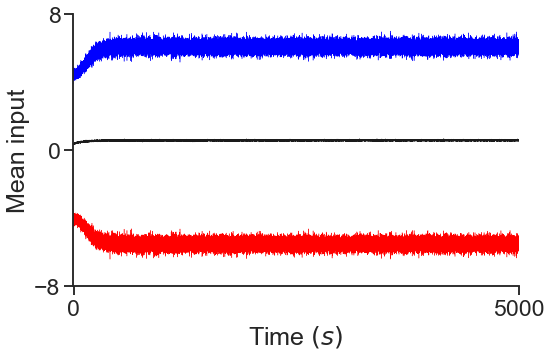

In [213]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":.43})

plt.plot(time_axis,Ie_current+Ix_current,color='blue')
plt.plot(time_axis,Ii_current,color='red')
plt.plot(time_axis,Ie_current+Ii_current+Ix_current,color='k')
    
plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Mean input')

plt.ylim((-8,8))
plt.xlim((0-5,T/1000+5))

plt.xticks((0,T/1000))
plt.yticks((-8,0,8))
sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/input_evolution_eiSTDP.pdf", bbox_inches="tight")


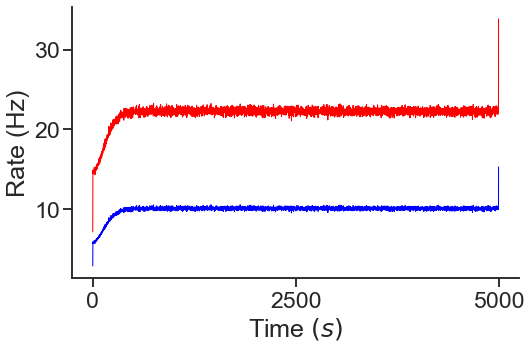

In [144]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":1.03})


plt.plot(1000*eRateT,color='blue')
plt.plot(1000*iRateT,color='red')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Rate (Hz)')

plt.xticks((0,T/1000/2,T/1000))

sns.despine()
plt.show()